# Linear Regression With One Variable
## Linear Function: 
$h_\theta = \theta_0 + \theta_1 x$
## Cost Function: 
$J(\theta) =  \frac{1}{2m}  \sum_{i=1}^{m}( h_\theta(x_i) - y_i)^2$
## Gradient Descent Algorithm For Linear Regression
$\theta_j:=\theta_j - \alpha  \frac{\partial }{\partial \theta_j}J(\theta_0, \theta_1)$

repeat until converegence {

$\theta_0:=\theta_0-\alpha\frac{1}{m} \sum_{i=1}^{m} (h_\theta (x_i) - y_i)$

$\theta_1:=\theta_1-\alpha\frac{1}{m} \sum_{i=1}^{m} (h_\theta (x_i) - y_i)\cdot x_i$

}

### Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np

### Data Generator

In [2]:
def create_random_data(N): 
    a, b = 1, 0.3
    xdata = np.random.uniform(0, 1, size=N)
    ydata = a * xdata + b + np.random.normal(0, 0.15, size=N)
    return {'x':np.array([[x] for x in xdata]), 'y':np.array([[y] for y in ydata])}

### Implementation of Cost Function: 

In [3]:
def cost_function(data_x, data_y, theta_0, theta_1):
    m, _ = np.shape(data_x)
    res = theta_0 + data_x*theta_1 - data_y
    return np.sum(res**2)/(2*m)

### Implementation of Gradient Descent Algorithm For Linear Regression

In [4]:
def find_best_parameters(data_x, data_y, theta_0, theta_1, alpha):
    m, _ = np.shape(data_x)
    last_cost = cost_function(data_x, data_y, -1,-1)
    actual_cost = last_cost - 1
    params = list()
    while actual_cost < last_cost:
        buf_arr = theta_0 + data_x*theta_1 - data_y
        theta_0 = theta_0 - alpha / m * np.sum(buf_arr)
        theta_1 = theta_1 - alpha / m * np.sum(buf_arr* data_x)
        last_cost = actual_cost
        actual_cost = cost_function(data_x, data_y, theta_0, theta_1)
        params.append([theta_0, theta_1])
    thetas = np.array(params)
    return theta_0, theta_1, thetas

### Generating Many Subplots

In [5]:
def generate_subplots(thetas, x_plot):
    last_pair = (def_theta_0,def_theta_1)
    final_pairs = list()
    for pair in thetas:
        if abs(last_pair[1] - pair[1]) > 0.1:
            final_pairs.append(pair)
            last_pair = pair        
    rgba = [1,0.55,0,0]
    diff = (1/len(final_pairs))
    for pair in final_pairs:
        plt.plot(x_plot, pair[0] + pair[1]*x_plot, color=tuple(rgba), linewidth =1)
        rgba[3] = min(1, rgba[3] + diff)


### Finding And Drawing Result For Best Linear Model

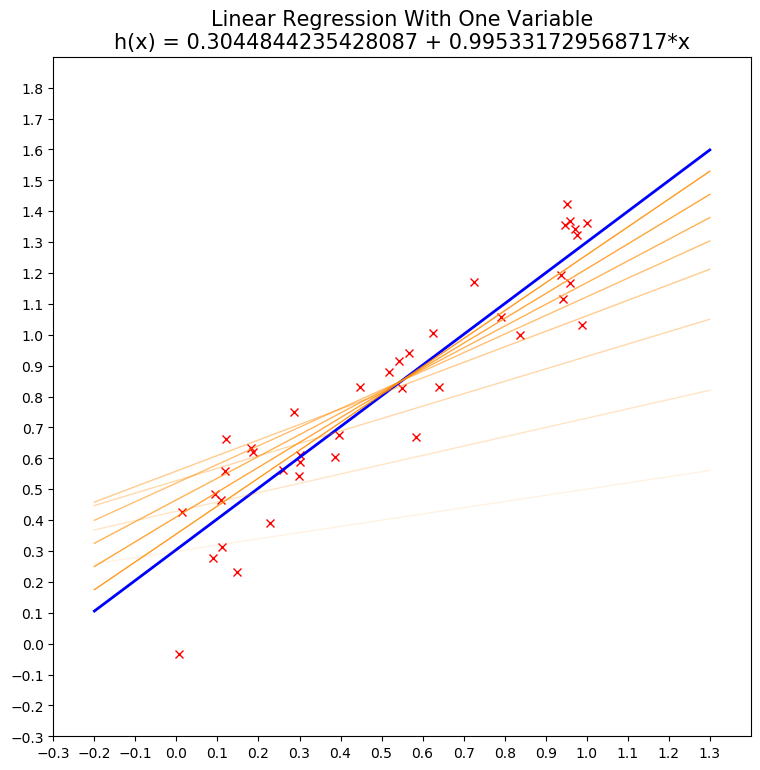

In [6]:
# default values
alpha = 0.01
def_theta_0 = 0
def_theta_1 = 0
x_min = -0.3
x_max = 1.4
y_min = -0.3
y_max = 1.9
period = 0.1

# graph settings
plt.figure(figsize=(9,9), dpi=100)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlim(x_min,x_max)
plt.ylim(y_min, y_max)
plt.xticks(np.arange(x_min, x_max, period))
plt.yticks(np.arange(y_min, y_max, period))

# raw data (dots) call:
data = create_random_data(40)
plt.plot(data['x'], data['y'], 'b x', markeredgecolor='red')

# linear regression function call:
theta_0, theta_1, thetas = find_best_parameters(data['x'], data['y'], def_theta_0, def_theta_1, alpha)
x_plot = np.arange(-0.2,1.4,0.3)
y_plot = theta_0+ theta_1*x_plot
plt.plot(x_plot, y_plot, color='blue', linewidth=2)

# subplots
generate_subplots(thetas, x_plot)

# showing resluts
params = f"h(x) = {theta_0} + {theta_1}*x"
plt.title(f"Linear Regression With One Variable\n{params}", fontsize = 15)
plt.show()